In [ ]:
# Backtracking: try to build a solution incrementally. If the path being tested is not a solution, it backwards to try another one.
# Imagine it as that games where you have a labirint to scape and try to find the way out.

# Problem: you have a knapsack that supports a maximum weight. You have a plenty of thing to put inside it and have to think about 
# what are the objects combinations that respect the maximum weight limit.

def rec(weigths, max_weight, i, combs, comb):
  """Find the valid combinations"""
  if max_weight < 0:
    # weight exceeded
    return
  elif i == len(weigths):
    # reached the end of array weights
    combs.append(comb.copy())
  else:
    # try what happens if you add and not add 

    # if add element to comb
    comb.append(i)
    rec(weigths, max_weight-weigths[i], i+1, combs, comb)
    # if not add the last element in the comb after the recursion above
    # back to previous step
    comb.pop()
    rec(weigths, max_weight, i+1, combs, comb)

def get_combs(weigths, max_weight):
  combs = [] # valid combinations
  rec(weigths, max_weight, 0, combs, [])
  return combs

weigths = [3, 7, 2, 1]
max_weight = 7
get_combs(weigths, max_weight)

[[0, 2, 3], [0, 2], [0, 3], [0], [1], [2, 3], [2], [3], []]

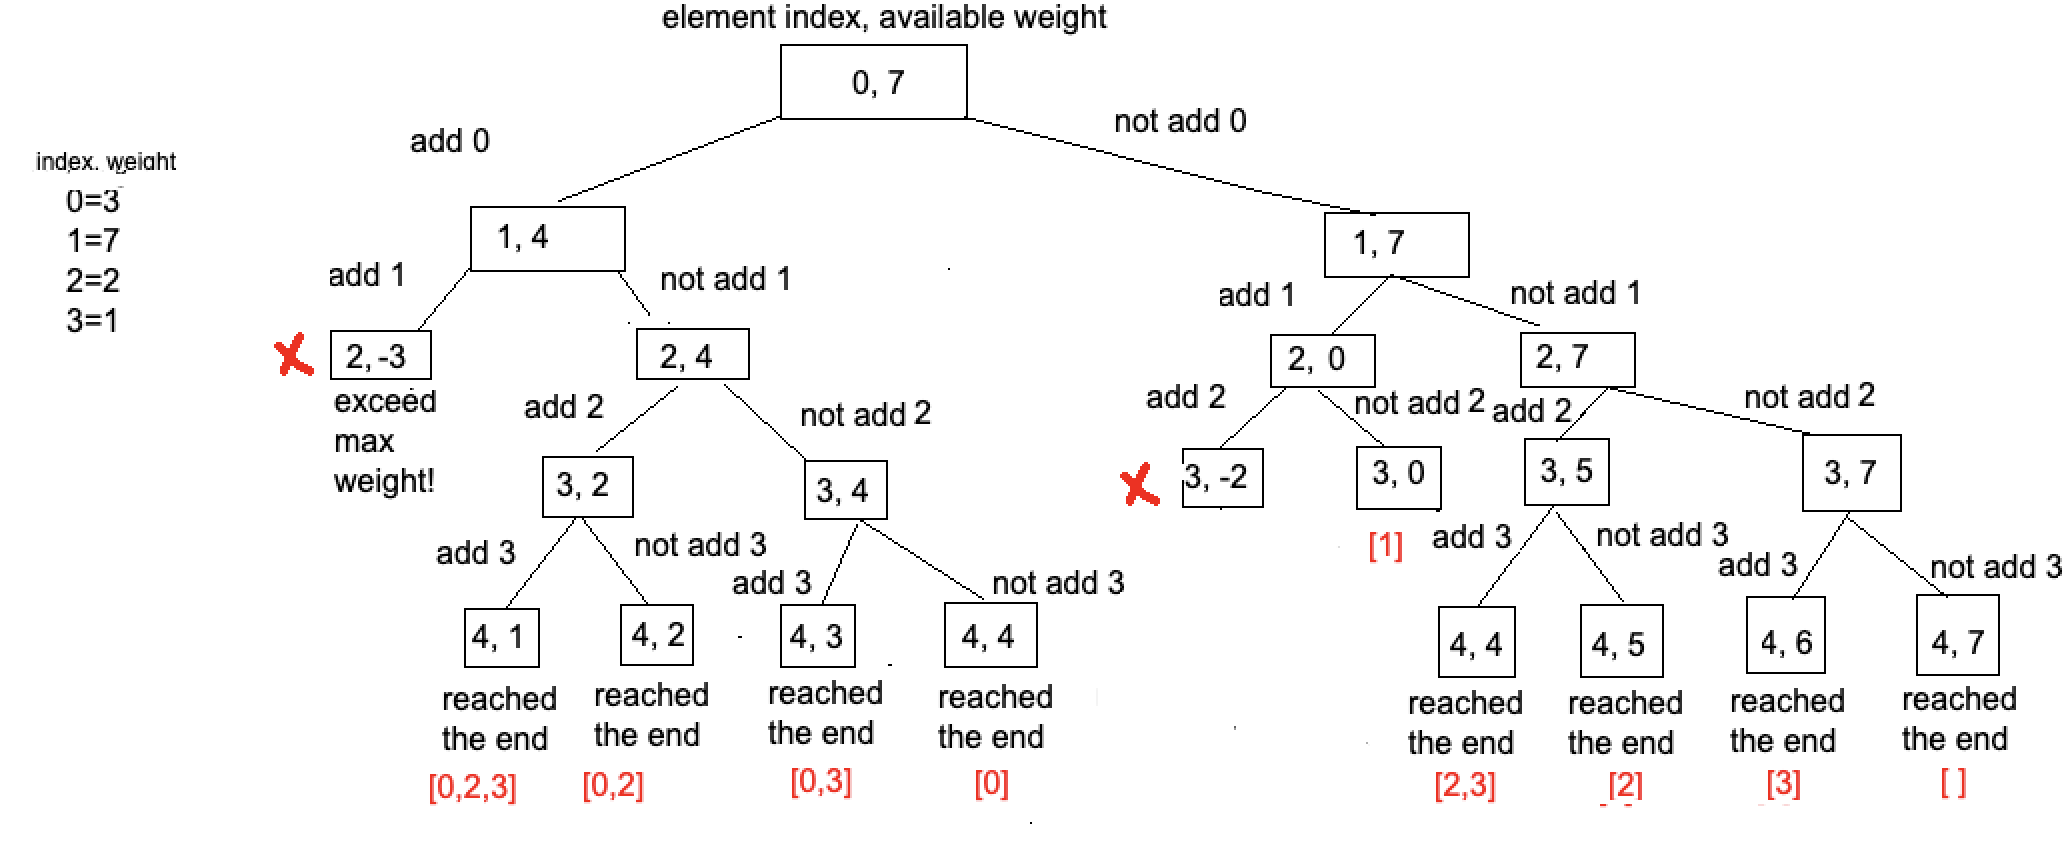

In [ ]:
from IPython.display import Image
Image(filename='/content/backtracking.png', embed=True)

In [ ]:
# alternative solution
def get_combs(weigths, max_weight, i):
  if i == len(weigths):
    # reach the end. Add empty combination
    return [[]]
  else:
    from_next = get_combs(weigths, max_weight, i+1)
    combs = []
    print(from_next)
    for comb in from_next:
      # add comb copy to combs before add more itens to it
      combs.append(comb.copy())
      # if comb total weight plus current item weight is below or equal the limit
      # add current item to the comb and append to combs list
      if (sum([weigths[item] for item in comb]) + weigths[i]) <= max_weight:
        comb.append(i)
        combs.append(comb.copy())
    return combs

weigths = [3, 7, 2, 1]
max_weight = 7
get_combs(weigths, max_weight, 0)

[[]]
[[], [3]]
[[], [2], [3], [3, 2]]
[[], [1], [2], [3], [3, 2]]


[[], [0], [1], [2], [2, 0], [3], [3, 0], [3, 2], [3, 2, 0]]

In [ ]:
""" N-queens problem: possible ways to put n queens in a n x n chessboard in a way that 
no queens attack each other when they are on the same column, row or diagnonal.
Example of a 4x4 board with 4 Queens (Q) that do not attack each other:
[[   , Q ,   ,  ]
 [   ,   ,   , Q]
 [ Q ,   ,   ,  ]
 [   ,   , Q ,  ]]
"""

def queen_not_attacked(board, row, col):
  """Check if there will be an attack between queens"""
  i = row - 1
  j_left = col - 1  # cell at the left diagonal
  j_right = col + 1 # cell at the right diagonal 
  while i >= 0:
    # if there is a Queen there will be an attack, so stop
    if board[i][col] == 'Q' \
    or (j_left >= 0 and board[i][j_left] == 'Q') \
    or (j_right < len(board) and board[i][j_right] == 'Q'):
      return False
    else:
      # if not attack occurs, continue checking by going to the previous row and diagonals
      i -= 1
      j_left -= 1
      j_right += 1
  return True

def n_queens(n, board, row):
  if row == n:
    # checked all and no queens attacked each other.
    return 1
  sum_ways = 0
  for i in range(n):
    if queen_not_attacked(board, row, i):
      board[row][i] = 'Q'
      sum_ways += n_queens(n, board, row+1)
      board[row][i] = '.'
  return sum_ways

n = 4
board = [['.'] * n for i in range(n)]
n_queens(n, board, 0)

2